# Financial Data - Stock Prices Analysis  

This project focus on exploratory data analysis of stock prices, as an exercise to improve visualization and pandas skills. It is not meant to be a robust financial analysis or be taken as financial advice  
____

## Data and Setup

In [198]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Data from 01/01/2006 to 01/01/2016 from:**  
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [199]:
# start date 01/01/2006
start_date = datetime.datetime(2006,1,1)

# end date 01/01/2016
end_date = datetime.datetime(2016,1,1)

In [200]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start_date, end_date)

# CitiGroup
C = data.DataReader("C", 'yahoo', start_date, end_date)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start_date, end_date)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start_date, end_date)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start_date, end_date)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start_date, end_date)

In [201]:
# Ticker symbols
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [202]:
#Merged data
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1)
# Set  column name levels
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [203]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

## EDA

In [204]:
#max Close price for each bank's stock throughout the time period
bank_stocks.xs(key='Close', level="Stock Info", axis=1).max().round(2)

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Calculate returns for each bank's stock. Rturns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [205]:
returns = pd.DataFrame()

In [206]:
for ticker in tickers:
    returns[ticker + " Return"] = bank_stocks[ticker]['Close'].pct_change()

In [224]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


Text(0.5, 1.08, 'Stock Returns')

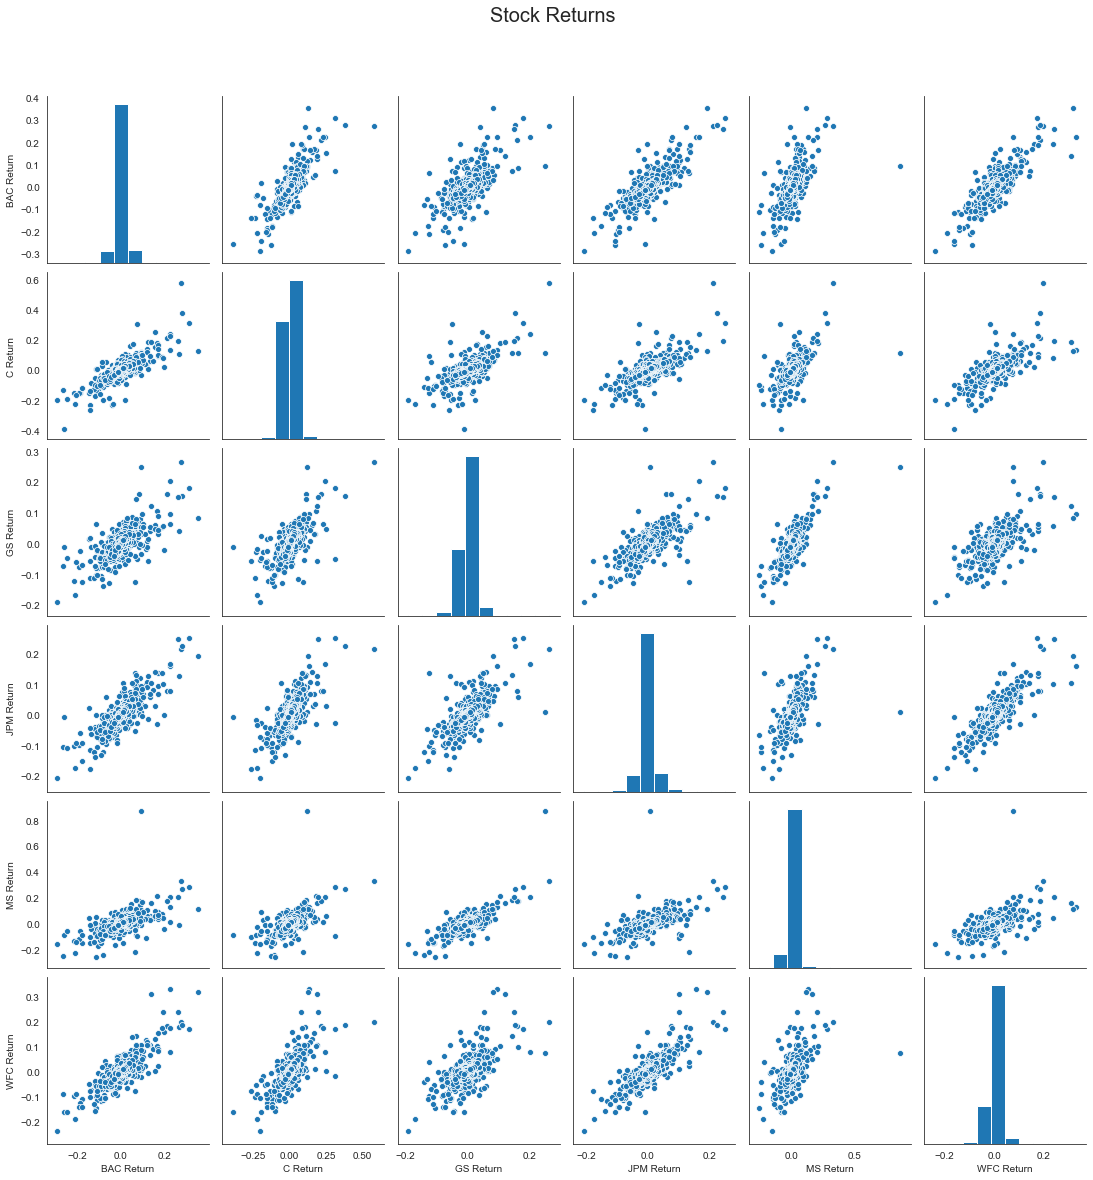

In [208]:
# Pairplot on returns, from 1: to avoid NaN values
ax = sns.pairplot(returns[1:])
ax.fig.suptitle('Stock Returns', y=1.08, fontsize=20)

In [209]:
# Worst drop
returns.idxmin() 

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [210]:
# Biggest gain
returns.idxmax() 

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [211]:
# Biggest std
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [212]:
# STD for Year = 2015
returns[returns.index.year==2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Text(0.5, 1.0, 'Returns 2015')

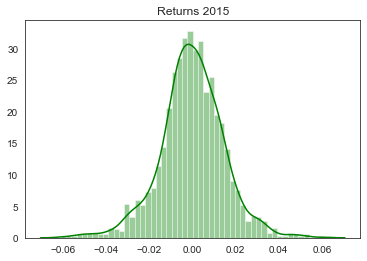

In [213]:
ax = sns.distplot(returns[returns.index.year==2015], color='green', bins=50 )
ax.set_title('Returns 2015')

Text(0.5, 1.0, 'CitiGroup returns')

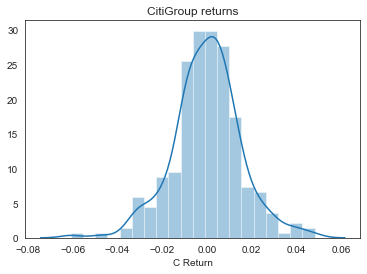

In [214]:
ax = sns.distplot(returns['C Return'][returns.index.year==2015])
ax.set_title('CitiGroup returns')

## Visualizations

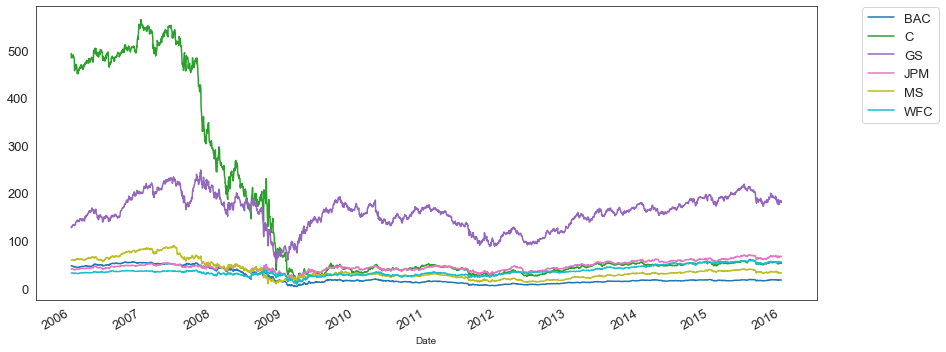

In [215]:
bank_stocks.xs(key='Close', level="Stock Info", axis=1).plot(figsize=(14,6), fontsize=13, colormap='tab10')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.8), fontsize=13)

**Moving Average**

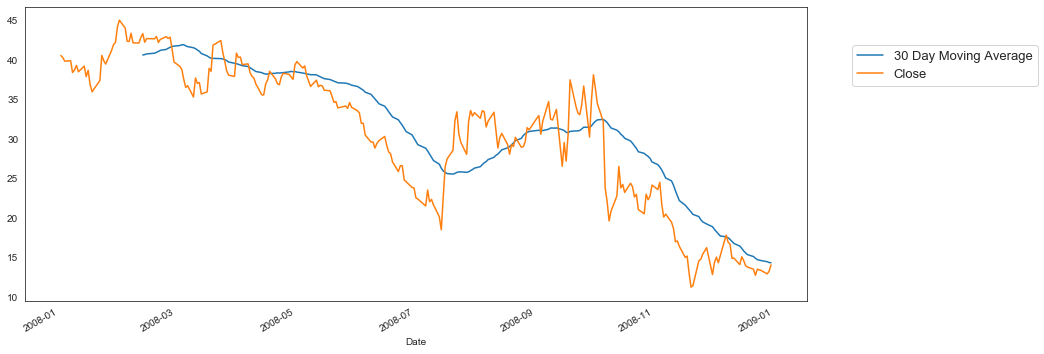

In [216]:
# rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
BAC[BAC.index.year==2008]['Close'].rolling(30).mean().plot(figsize=(14,6))
BAC[BAC.index.year==2008]['Close'].plot()
plt.legend(['30 Day Moving Average', 'Close'],loc='center left', bbox_to_anchor=(1.05, 0.8), fontsize=13)

Text(0.5, 1, 'Correlation HeatMap')

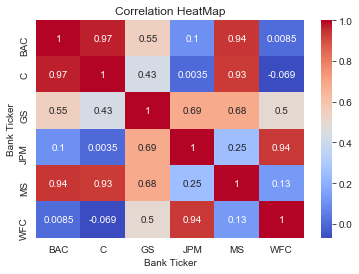

In [226]:
ax = sns.heatmap(bank_stocks.xs(key='Close', level="Stock Info", axis=1).corr(), cmap='coolwarm', annot=True)
ax.set_title('Correlation HeatMap')

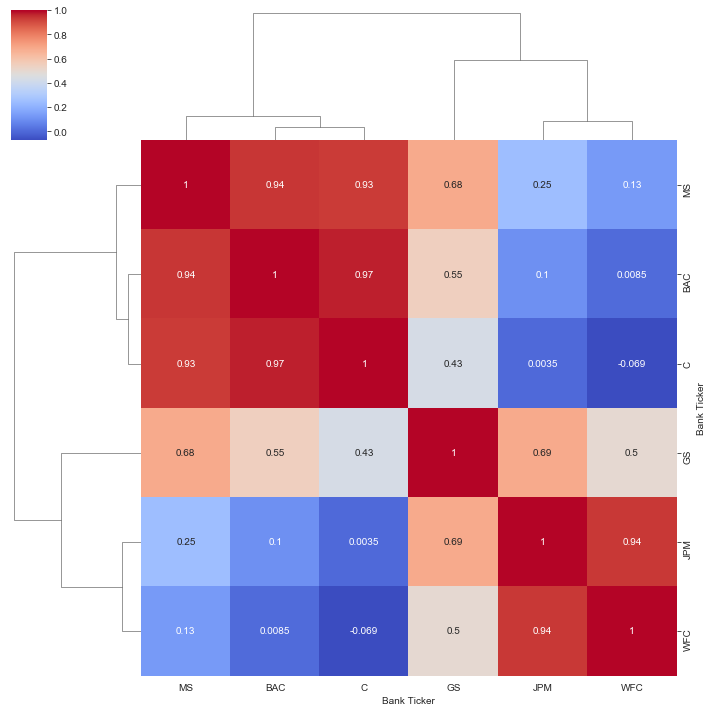

In [225]:
ax = sns.clustermap(bank_stocks.xs(key='Close', level="Stock Info", axis=1).corr(), cmap='coolwarm', annot=True)